# Sorting algorithm comparison
## Experiment details
Each sorting algorithm was implemented and tasked with sorting equal for each sort 4-byte unsigned integer array of different sizes. Testing stops if algorithm takes more than 2 seconds to process one test case.
## Testing

In [1]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt

Lets run the test manager program. It will create a .CSV file containing the results of each test. Running the segment below may take a while, though (original testing was finished in 2910 seconds).

In [2]:
os.system("make test")  # Run all tests.

g++ -I./ -I./sortings/ -O3 ./main.cpp -o ./build/main.out
make run
make[1]: Entering directory '/root/projects/algorithms/semester2/prac2'
cd ./build && ./main.out
Testing has started.
bobble_sort:	###############################  [22.57812 s] [fin. at 22.57812 s] [  15 tests]
choice_sort:	###############################  [217.43750 s] [fin. at 240.01562 s] [  50 tests]
insert_sort:	###############################  [166.57812 s] [fin. at 406.59375 s] [  50 tests]
qsort_3mid:	###############################  [245.34375 s] [fin. at 651.93750 s] [ 100 tests]
qsort_rand:	###############################  [280.89062 s] [fin. at 932.82812 s] [ 100 tests]
qsort_mmid:	###############################  [528.73438 s] [fin. at 1461.56250 s] [ 100 tests]
merge_sort:	###############################  [252.76562 s] [fin. at 1714.32812 s] [ 100 tests]
lsd_sort:	###############################  [49.50000 s] [fin. at 1763.82812 s] [ 100 tests]
heap_sort2:	###############################  [39.37500 s] [fin

0

## Test result processing
We can now parse test result file and analyze which sorting algorithms work best in given scenario.

In [3]:
table = pd.read_csv("build/measurements.csv")
print(table.head(10))

   TestID      Subject   Size    Time
0       0  bobble_sort   1000       0
1       1  bobble_sort   3000    6250
2       2  bobble_sort   5000   12500
3       3  bobble_sort   7000   31250
4       4  bobble_sort   9000   56250
5       5  bobble_sort  11000   87500
6       6  bobble_sort  13000  134375
7       7  bobble_sort  15000  187500
8       8  bobble_sort  17000  259375
9       9  bobble_sort  19000  340625


Let's see some graphs.

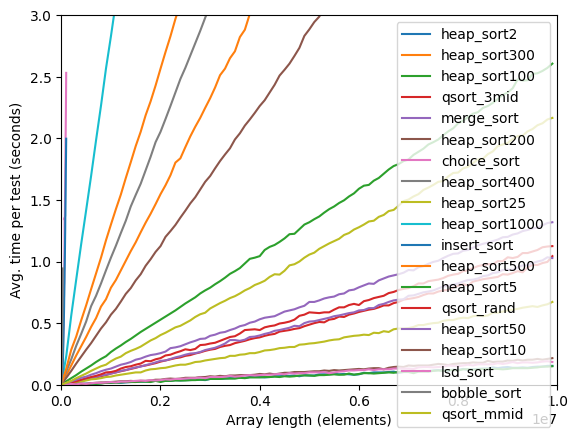

In [17]:
x_size = 0

sort_types = list(set(table["Subject"].unique()))

for sort_type in sort_types:
    plt.plot(table[table["Subject"] == sort_type].Size,
             table[table["Subject"] == sort_type].Time / 1e6,
             label = sort_type)

plt.ylim(ymin = 0.0, ymax = 3.0)  # Clip super high quadratic sorting times as they are astronomically large and flatten more interesting results.
plt.xlim(xmin = 0, xmax = 1e7)

plt.xlabel("Array length (elements)")
plt.ylabel("Avg. time per test (seconds)")
plt.legend(loc = "upper right")
plt.draw()

## Conclusion
As we can see, not all sorting algorithms are created equal. With relatively small array component size (4 bytes) and O(1) comparison time all quadratic sorts fail to reach nearly the speeds of logarithmic counterparts. Logarithmic sorting algorithms just work as intended. Quick sort with median-of-medians pivot selector is the slowest (huge constant reminds of itself) with merge sort and other qsort modifications being far in front without much difference between each other. Least Significant Digit sort is, to no surprize, is the fastest sorting algorithm for large sets of small byte-comparable elements. It clearly breaks all records in speed, but loses to other sorting algorithms in practicality, especially in generalization of array elements.

Heap sorting works best with 2 children (and asymptotics says so, as each heap sorting algorithms with K children works in O(N log_K(N)) time) and stays relatively close to other logarithmic sorts.